# Human-in-the-Loop (HITL) Testing Exercise
Introduction
Human-in-the-Loop (HITL) testing is a methodology where human judgment is incorporated into the evaluation process of machine learning models. It is especially valuable when:

- Model predictions are subjective or nuanced.
Automated evaluation metrics (like accuracy or F1 score) fail to capture subtle aspects of quality.
- Human reviewers can provide context-aware ratings, ensuring that the model's behavior aligns with real-world expectations.

### Tools Used:
- Pandas: A data manipulation and analysis library for Python, providing data structures like DataFrames.
- Matplotlib: A Python plotting library for creating static, animated, and interactive visualizations.
- Transformers: A Hugging Face library for working with state-of-the-art machine learning models, including pre-trained chatbots.

### Step 0: Install Required Libraries

In [ ]:
# Import required libraries
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Load Sentiment Analysis Model
Use a pre-trained model, such as Hugging Face's transformers library, to generate predictions.

In [ ]:
# Load Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


### Step 2: Prepare Sample Dataset
Example sentences with simulated ground-truth sentiment labels:

In [ ]:
# Example dataset of sentences
data = {
    "sentence": [
        "This is the best movie I've seen all year!",
        "I can't believe how bad the food was, totally ruined my night.",
        "The product is fine, but the shipping took forever.",
        "Amazing customer service! They resolved my issue quickly.",
        "Such a disappointing experience; I expected much better.",
    ],
    # Simulated true labels (could be replaced with human-provided labels)
    "true_sentiment": ["positive", "negative", "neutral", "positive", "negative"]
}

# Convert data into a Pandas DataFrame for easy manipulation
df = pd.DataFrame(data)
df

,sentence,true_sentiment
0,This is the best movie I've seen all year!,positive
1,"I can't believe how bad the food was, totally ...",negative
2,"The product is fine, but the shipping took for...",neutral
3,Amazing customer service! They resolved my iss...,positive
4,Such a disappointing experience; I expected mu...,negative


### Step 3: Generate Predictions

In [ ]:
# Use the pre-trained model to predict the sentiment of each sentence
df["predicted_sentiment"] = df["sentence"].apply(lambda x: sentiment_model(x)[0]["label"].lower())
df

,sentence,true_sentiment,predicted_sentiment
0,This is the best movie I've seen all year!,positive,positive
1,"I can't believe how bad the food was, totally ...",negative,negative
2,"The product is fine, but the shipping took for...",neutral,negative
3,Amazing customer service! They resolved my iss...,positive,positive
4,Such a disappointing experience; I expected mu...,negative,negative


Step 4: Simulate Human Review

In [ ]:
# Simulate human ratings for accuracy (1 for correct, 0 for incorrect)
df["human_rating"] = (df["predicted_sentiment"] == df["true_sentiment"]).astype(int)
df

,sentence,true_sentiment,predicted_sentiment,human_rating
0,This is the best movie I've seen all year!,positive,positive,1
1,"I can't believe how bad the food was, totally ...",negative,negative,1
2,"The product is fine, but the shipping took for...",neutral,negative,0
3,Amazing customer service! They resolved my iss...,positive,positive,1
4,Such a disappointing experience; I expected mu...,negative,negative,1


### Step 5: Analyze Results

In [ ]:
# Calculate the overall accuracy based on human ratings
accuracy = df["human_rating"].mean()
print(f"Model Accuracy (based on human ratings): {accuracy * 100:.2f}%")

# Identify Discrepancies
discrepancies = df[df["human_rating"] == 0]
print("\nDiscrepancies (Model vs. True Sentiment):")
print(discrepancies)

Model Accuracy (based on human ratings): 80.00%

Discrepancies (Model vs. True Sentiment):
                                            sentence true_sentiment  \
2  The product is fine, but the shipping took for...        neutral   

  predicted_sentiment  human_rating  
2            negative             0  


### Step 6: Visualize Results

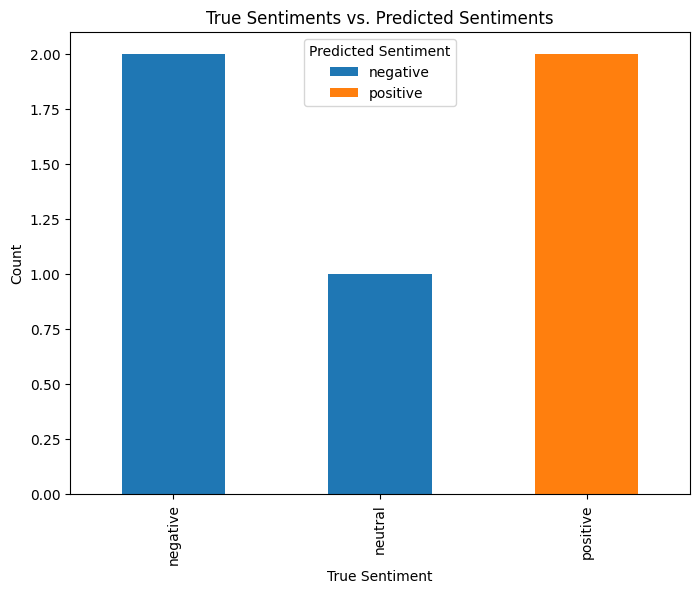

In [ ]:
# Bar chart for predicted vs. true sentiments
sentiment_counts = df.groupby("true_sentiment")["predicted_sentiment"].value_counts().unstack()

# Plot the stacked bar chart
sentiment_counts.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("True Sentiments vs. Predicted Sentiments")
plt.xlabel("True Sentiment")
plt.ylabel("Count")
plt.legend(title="Predicted Sentiment")
plt.show()

### Exercise Questions
Analyze the bar chart and answer the following:

1. Which sentiment category does the model struggle with the most? Why do you think this happens?
2. If you were tasked with improving the model, what steps might you take to address the misclassification issue?


### Answers:
1. The model struggles most with neutral sentiment, as it misclassifies all neutral instances as "positive." This likely happens due to insufficient or imbalanced training data for the neutral category and the subtle differences between neutral and other sentiments.
2. To improve neutral sentiment classification, collect more neutral examples to balance the data, fine-tune the model with advanced architectures like BERT, and use thresholds or feature engineering to better differentiate sentiments.